In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean

In [55]:
df=pd.read_csv("songs_normalize.csv")

In [56]:
df.head(20) 

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.861,103.035,"pop, rock"
8,Destiny's Child,Say My Name,271333,False,1999,75,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,"pop, R&B"
9,Modjo,Lady - Hear Me Tonight,307153,False,2001,77,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,Dance/Electronic


In [57]:
#estimation of locations using  mean,median ,mode,trimmed mean,weigthed mean 
#estimation for singers popularity  


print(df["popularity"].mean())


59.8725


In [58]:
print(trim_mean(df["popularity"],0.1))

64.34375


In [59]:
print(df["popularity"].median())

65.5


In [60]:
#weighted mean 
# year act as weight and popularity as normal data point

weighted_mean= ((df["popularity"]*df["year"]).sum())/(df["popularity"].sum())

print(weighted_mean)


2009.4860161175832


In [61]:
#most popular artist in 2000-2019 in spotify  
mean_popularity = df.groupby('artist')['popularity'].mean()

# Identify the most popular artist
most_popular_artist = mean_popularity.idxmax()
highest_mean_popularity = mean_popularity.max()


print(f"The most popular artist is {most_popular_artist} with a mean popularity of {highest_mean_popularity}.")



The most popular artist is Tom Odell with a mean popularity of 88.0.


In [62]:
#estimation of variablity


In [63]:
print (df["popularity"].std())

21.335577029309245


In [64]:
print (df["popularity"].var())

455.20684717358836


In [65]:
#third quantile

print (df["popularity"].quantile(0.75))

73.0


In [66]:

#first quantile

print (df["popularity"].quantile(0.25))

56.0


In [67]:
#IQR and outliers
q1=df["popularity"].quantile(0.25)
q3=(df["popularity"].quantile(0.75))
iqr=q3-q1


print(f"IQR is {iqr}")

#outliers
print("outliers are")
print(1.5*(q3-q1))

IQR is 17.0
outliers are
25.5


In [76]:
#frequency table


bin_edges = [0, 20,40, 60, 80, 100]
binnedpopularity = pd.cut(df['popularity'],bins=bin_edges)

print(binnedpopularity.value_counts().sort_index())


popularity
(0, 20]        58
(20, 40]       38
(40, 60]      481
(60, 80]     1205
(80, 100]      92
Name: count, dtype: int64


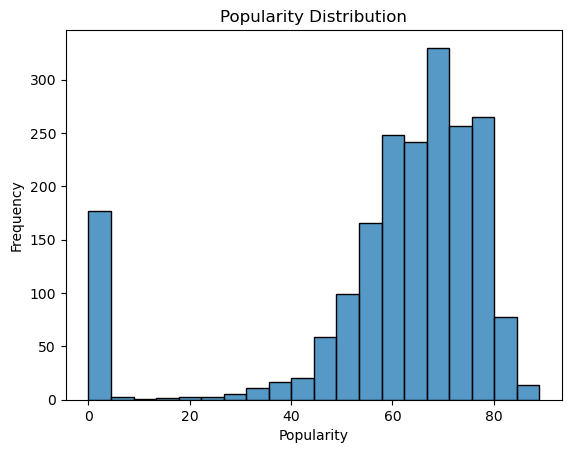

In [81]:
#histograms


sns.histplot(data=df,x='popularity',bins=20)
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

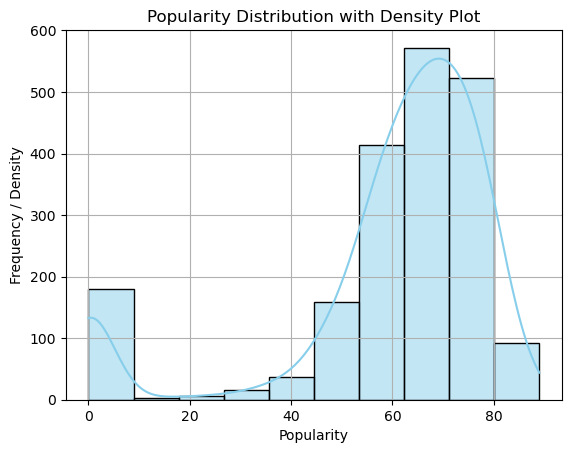

In [83]:
#
sns.histplot(data=df, x='popularity', bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Popularity Distribution with Density Plot')
plt.xlabel('Popularity')
plt.ylabel('Frequency / Density')
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [103]:
#categorical and binary data


df_subset = df.iloc[0:200] 
df_subset.head()




,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


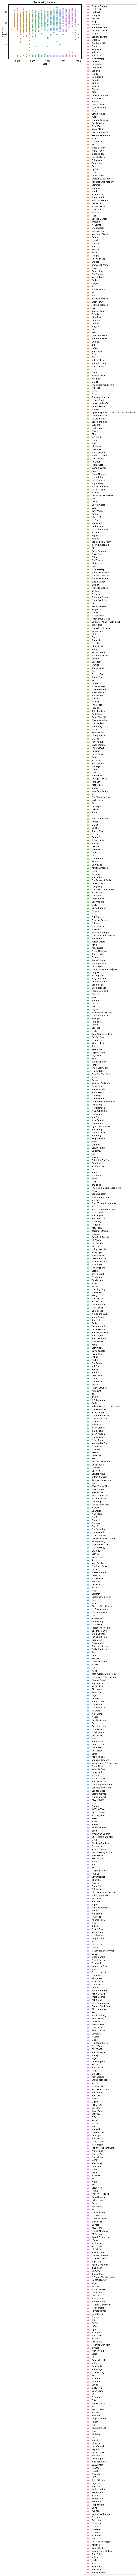

In [97]:
# Scatter plot
sns.scatterplot(data=df, x='year', y='popularity', hue='artist')
plt.title('Popularity by Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

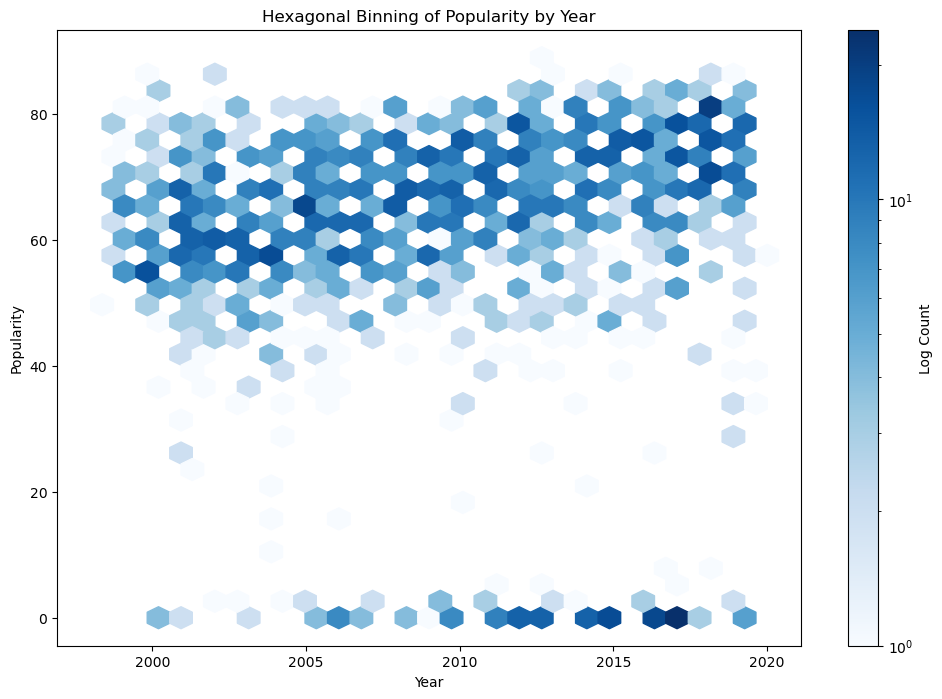

In [91]:
# Hexagonal binning
plt.figure(figsize=(12, 8))
plt.hexbin(df['year'], df['popularity'], gridsize=30, cmap='Blues', bins='log')
plt.colorbar(label='Log Count')  # Add a color bar to show the log scale of counts
plt.title('Hexagonal Binning of Popularity by Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

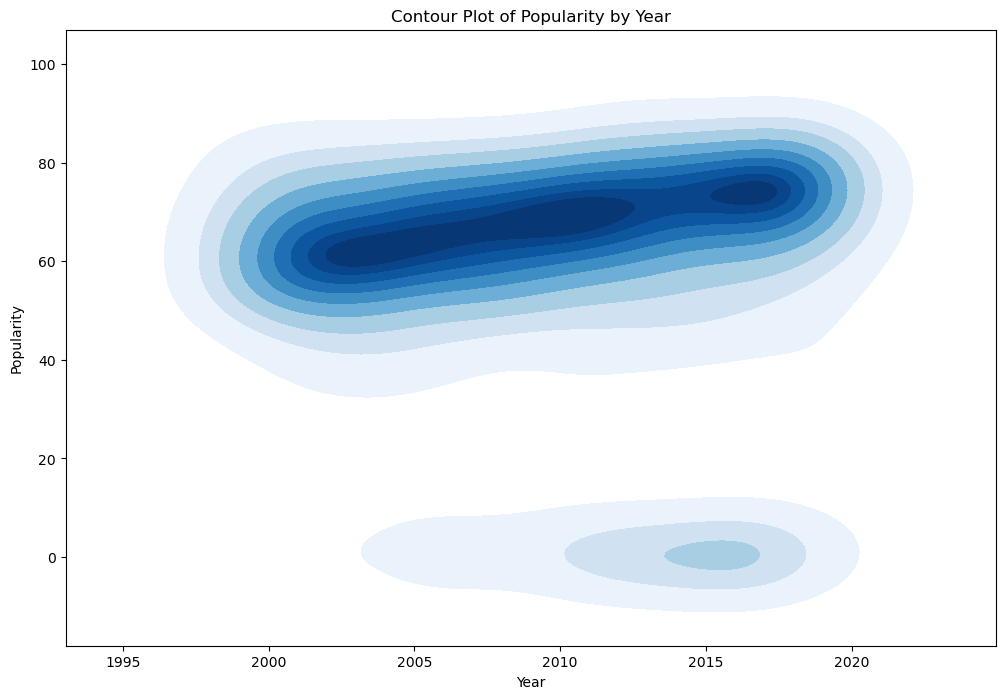

In [98]:
# Plot contour using seaborn
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='year', y='popularity', cmap='Blues', fill=True)
plt.title('Contour Plot of Popularity by Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

In [99]:
# Create a contingency table
contingency_table = pd.crosstab(df['year'], df['artist'])

print(contingency_table)

artist  *NSYNC  112  2 Chainz  21 Savage  2Pac  3 Doors Down  3LW  3OH!3  \
year                                                                       
1998         0    0         0          0     0             0    0      0   
1999         0    0         0          0     0             0    0      0   
2000         2    0         0          0     0             1    1      0   
2001         2    2         0          0     1             0    0      0   
2002         0    0         0          0     0             2    0      0   
2003         0    0         0          0     0             0    0      0   
2004         0    0         0          0     1             0    0      0   
2005         0    0         0          0     0             0    0      0   
2006         0    0         0          0     0             0    0      0   
2007         0    0         0          0     0             0    0      0   
2008         0    0         0          0     0             1    0      1   
2009        

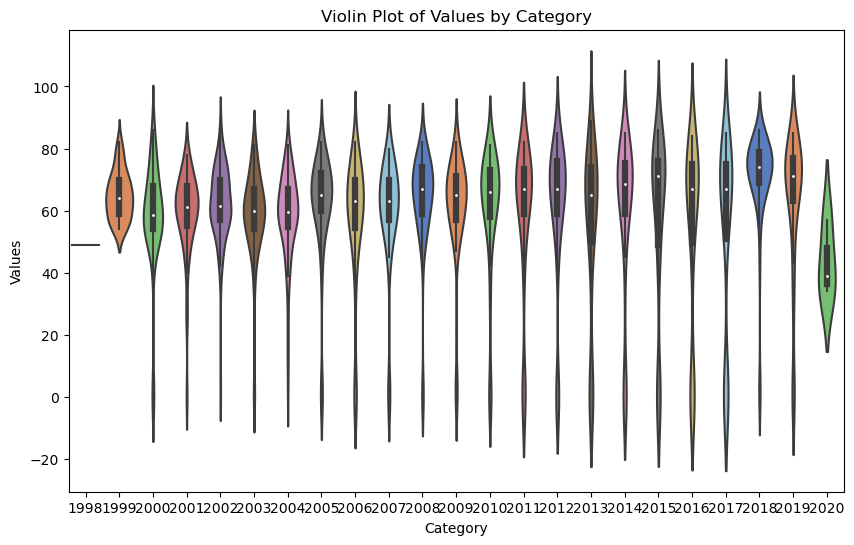

In [105]:
#violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='year', y='popularity', palette='muted')
plt.title('Violin Plot of Values by Category')
plt.xlabel('Category')
plt.ylabel('Values')
plt.show()

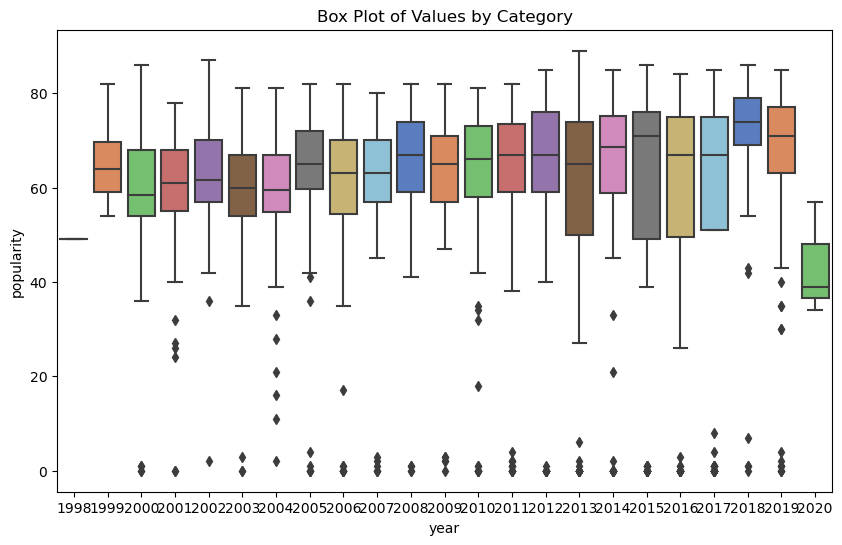

In [106]:
#boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='popularity', palette='muted')
plt.title('Box Plot of Values by Category')
plt.xlabel('year')
plt.ylabel('popularity')
plt.show()